In [7]:
# Import yfinance library
# This library is used to download stock market data directly from Yahoo Finance
import yfinance as yf

In [8]:
# Download historical stock data for Apple Inc. (AAPL)
stock_market = yf.download('AAPL')

/tmp/ipython-input-1557394349.py:1: FutureWarning: YF.download() has changed argument auto_adjust default to True
  stock_market = yf.download('AAPL')
[*********************100%***********************]  1 of 1 completed


In [9]:
# Display the entire dataset
stock_market

Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
2025-12-15,274.109985,280.149994,272.839996,280.149994,50409100
2025-12-16,274.609985,275.500000,271.790009,272.820007,37648600
2025-12-17,271.839996,276.160004,271.640015,275.010010,50138700
2025-12-18,272.190002,273.630005,266.950012,273.609985,51630700
2025-12-19,273.670013,274.600006,269.899994,272.149994,144632000
2025-12-22,270.970001,273.880005,270.510010,272.859985,36571800
2025-12-23,272.359985,272.500000,269.559998,270.839996,29642000
2025-12-24,273.809998,275.429993,272.200012,272.339996,17910600


In [10]:
# Display the first 5 rows of the dataset
stock_market.head()

Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
2025-12-15,274.109985,280.149994,272.839996,280.149994,50409100
2025-12-16,274.609985,275.500000,271.790009,272.820007,37648600
2025-12-17,271.839996,276.160004,271.640015,275.010010,50138700
2025-12-18,272.190002,273.630005,266.950012,273.609985,51630700
2025-12-19,273.670013,274.600006,269.899994,272.149994,144632000


In [12]:
# Get information about dataset
stock_market.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 20 entries, 2025-12-15 to 2026-01-13
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   (Close, AAPL)   20 non-null     float64
 1   (High, AAPL)    20 non-null     float64
 2   (Low, AAPL)     20 non-null     float64
 3   (Open, AAPL)    20 non-null     float64
 4   (Volume, AAPL)  20 non-null     int64  
dtypes: float64(4), int64(1)
memory usage: 960.0 bytes


In [13]:
stock_market.columns

MultiIndex([( 'Close', 'AAPL'),
            (  'High', 'AAPL'),
            (   'Low', 'AAPL'),
            (  'Open', 'AAPL'),
            ('Volume', 'AAPL')],
           names=['Price', 'Ticker'])

In [14]:
stock_market.describe()

Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
count,20.000000,20.000000,20.000000,20.000000,2.000000e+01
mean,268.736497,271.020497,266.940502,269.513499,4.185861e+07
std,6.015006,6.552525,6.276768,6.420756,2.772422e+07
min,259.040009,259.290009,255.699997,257.019989,4.147933e+06
25%,261.852486,266.582489,261.542496,266.050003,2.639900e+07
50%,271.849991,273.779999,269.729996,272.300003,3.891755e+07
75%,273.467499,275.384995,271.892509,272.909988,5.020630e+07
max,274.609985,280.149994,272.859985,280.149994,1.446320e+08


In [15]:
# Select features (independent variables)
# Open, High, Low, and Volume are used to predict Close price
features = stock_market[['High','Low', 'Open', 'Volume']]
# Target variable (dependent variable)
closing = stock_market['Close']

In [16]:
# Import train-test split function
from sklearn.model_selection import train_test_split
# Split the data into training and testing sets
# test_size=0.2 means 20% data is used for testing
X_train, X_test, y_train, y_test = train_test_split(features, closing, test_size=0.2)

In [17]:
# Import Linear Regression Algorithm
from sklearn.linear_model import LinearRegression
# Create the model
model = LinearRegression()

# Train the model using training data
model.fit(X_train, y_train)

LinearRegression()

In [18]:
#See the accuracy score of your model
model.score(X_test, y_test)

0.8603545476966069

In [21]:
import matplotlib.pyplot as plt

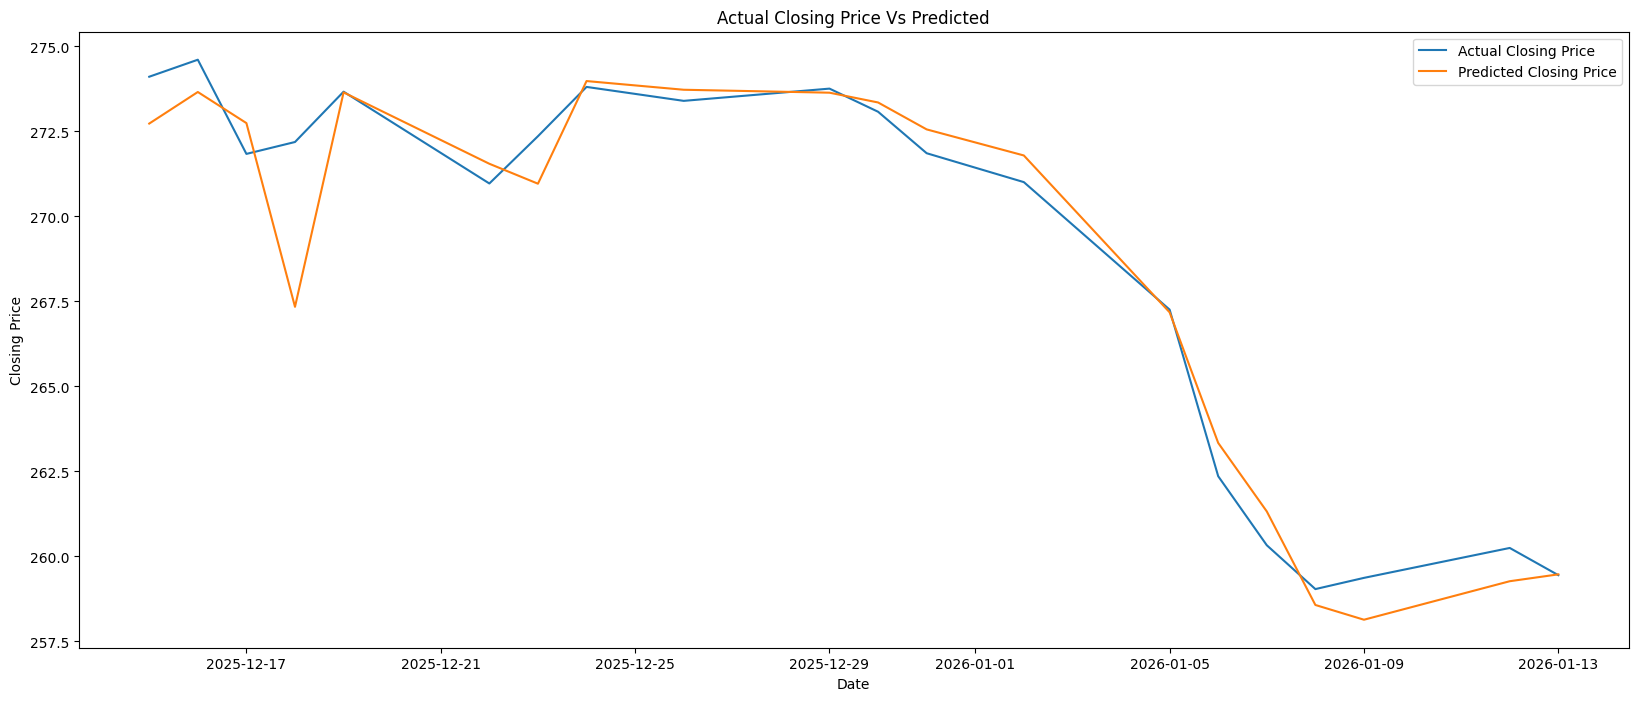

In [22]:
#Create a chart to show actual closing price from dataset and predicted closing price
plt.figure(figsize=(20,8))
plt.plot(stock_market.index, closing, label="Actual Closing Price") #First plot to visualize actual closing price
plt.plot(stock_market.index, model.predict(features), label="Predicted Closing Price")  #Second plot to visualize predicted closing price
plt.title('Actual Closing Price Vs Predicted')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.legend()
plt.show()

In [23]:
# Import Random Forest Regressor
# Random Forest is an ensemble learning algorithm
from sklearn.ensemble import RandomForestRegressor
# Create the Random Forest model
new_model = RandomForestRegressor()
# Train the model using training data
new_model.fit(X_train, y_train)
#Print the accuracy score
new_model.score(X_test, y_test)

/usr/local/lib/python3.12/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


0.9644896450786519

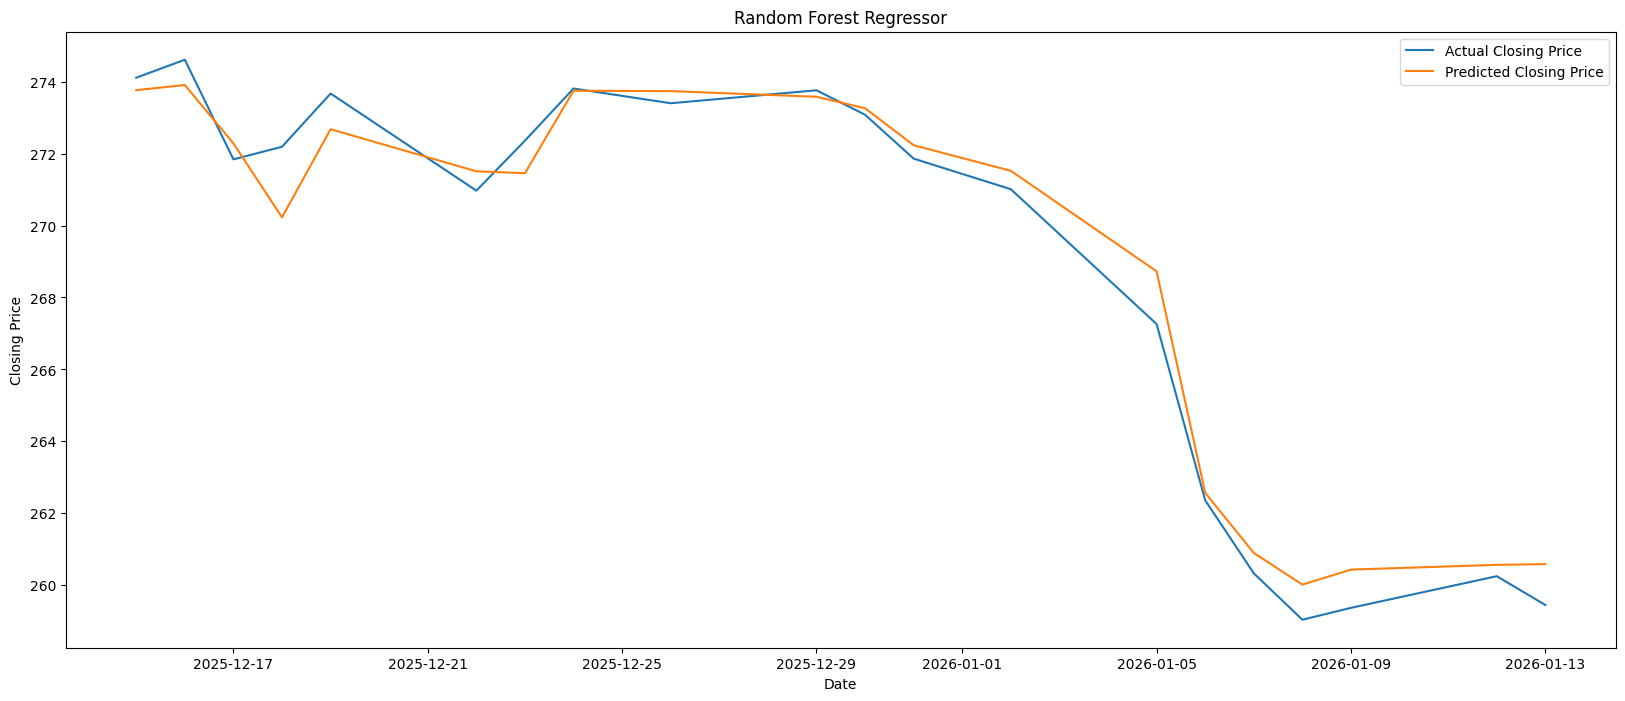

In [24]:
#Create a chart to show actual closing price from dataset and predicted closing price
plt.figure(figsize=(20, 8))
plt.plot(stock_market.index, closing, label="Actual Closing Price") #First plot to visualize actual closing price
plt.plot(stock_market.index, new_model.predict(features), label="Predicted Closing Price")  #Second plot to visualize predicted closing price
plt.title("Random Forest Regressor")
plt.xlabel("Date")
plt.ylabel("Closing Price")
plt.legend()
plt.show()